In [1]:
import numpy as np

In [94]:
class Logistic_Regression():
    
    def __init__(self,learning_rate,no_of_iterations):
        
        self.learning_rate=learning_rate
        self.no_of_iterations=no_of_iterations
        
        
    def fit(self,X,Y):
        self.m,self.n=X.shape
        

        self.w=np.zeros(self.n)
        
        self.b=0
        
        self.X=X
        
        self.Y=Y
        
        for i in range(self.no_of_iterations):
            self.update_weights()
        
    def update_weights(self):
        
        Y_hat=1/(1 + np.exp(-(self.X.dot(self.w)+self.b)))
        
        dw=(1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
        
        db=(1/self.m)*np.sum(Y_hat -self.Y)
        
        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db
        
    def predict(self,X):
        Y_pred= 1/(1 + np.exp(-(self.X.dot(self.w)+self.b)))
        Y_pred=np.where(Y_pred>0.5,1,0)
        return Y_pred

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.shape

(768, 9)

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [22]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

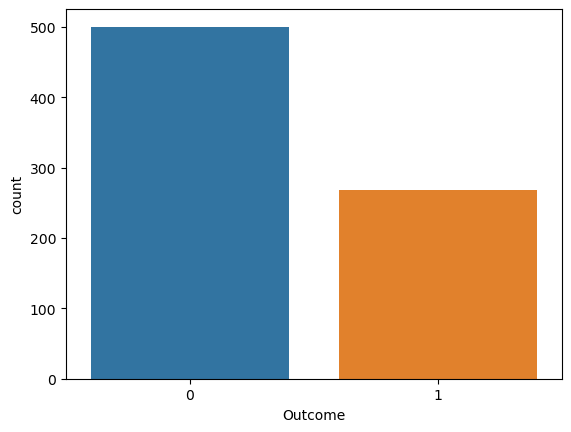

In [25]:
sns.countplot(x='Outcome',data=df)
plt.show()

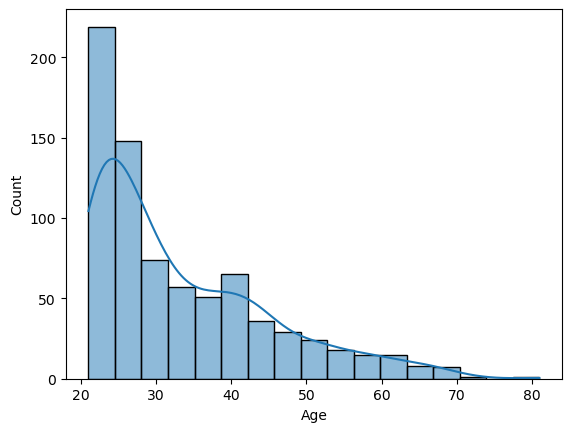

In [28]:
sns.histplot(df['Age'],kde=True)
plt.show()

In [30]:
df['Pregnancies'].value_counts().sum()

768

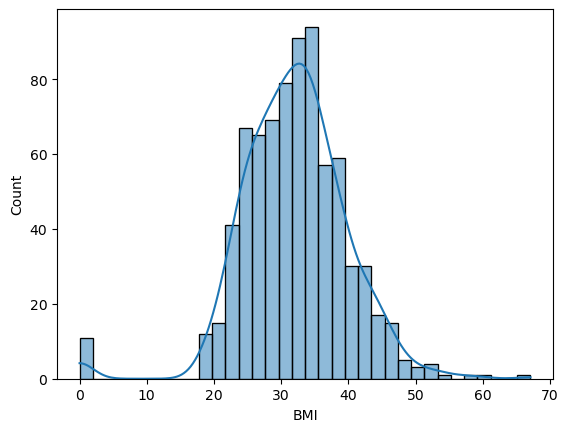

In [31]:
sns.histplot(df['BMI'],kde=True)
plt.show()

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
X=df.drop('Outcome',axis=1)

In [45]:
Y=df['Outcome']

In [46]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [47]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [53]:
scaler=StandardScaler()

In [54]:
scaler.fit(X)

StandardScaler()

In [56]:
X=scaler.transform(X)

In [57]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [109]:
classifier=Logistic_Regression(learning_rate=0.01,no_of_iterations=1000)

In [110]:
classifier.fit(X_train, Y_train)

In [111]:
training_data_predict=classifier.predict(X_train)

In [112]:
accuracy=accuracy_score(training_data_predict,Y_train)
accuracy

0.7768729641693811

In [113]:
test_data_predict=classifier.predict(X_test)

In [123]:
input_data=(10,139,80,0,0,27.1,1.441,57)


input_as_array=np.asarray(input_data)

input_as_array_rehape=input_as_array.reshape(1,-1)

std_data=scaler.transform(input_as_array_rehape)

print(std_data)

prediction=classifier.predict(std_data)

print(prediction) 

if (prediction[0] == 0):
    print('Healthy')
else:
    print('Diabetes')

[[ 1.82781311  0.56664949  0.56322275 -1.28821221 -0.69289057 -0.62096232
   2.92686858  2.02160968]]
[0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
